# Connect to my Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


# Splitting the news and removing deactivated words
We store the processed tags and news data in 'new.csv' file for later use.

In [ ]:
import csv
import os
import jieba
import re

stopwords = [i.strip() for i in open('/content/drive/My Drive/580final/cn_stopwords.txt',"r", encoding="utf-8").readlines()]

def pretty_cut(sentence):
    cut_list = jieba.lcut(''.join(re.findall('[\u4e00-\u9fa5]', sentence)), cut_all=True)
    for i in range(len(cut_list) - 1, -1, -1):
        if cut_list[i] in stopwords:
            del cut_list[i]
    return cut_list


In [ ]:
# Don't need to re-run this cell, if already have the 'news.csv' file
f = open ("/content/drive/My Drive/580final/toutiao_cat_data.txt", "r", encoding="utf-8")
lines = f.readlines()
f.close()
with open(os.path.join("/content/drive/My Drive/580final/news.csv"), "w", encoding="utf-8", newline='') as g:
    writer = csv.writer(g)
    writer.writerow(["label", "news"])
    for line in lines:
        x = line.strip(" ")
        x = line.strip("\n")
        y = x.split("_!_")
        z = " ".join(y)
        cut_y = " ".join(pretty_cut(z))
        writer.writerow([y[2],cut_y])

# Load Data

In [19]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/580final/news.csv', delimiter=",",names=['label','news'])
print("Data volume: %d ." % len(df))
df.sample(10)# View a sample of the data set



Data volume: 382689 .


,label,news
6552,news_game,竞速 玩家 出售 高价 账号 武器 亮 瞎眼 卖 号 原因 不堪 不堪入目 武器 增幅
29748,news_house,赣州 大学
228097,news_house,建 滔 裕 花园 继 物业 曝 不作 现 违规 收取 购房 购房者 预约 金 期 商业 购房...
197499,news_agriculture,月 小龙 小龙虾 龙虾 养殖 青苔 问题 几点 建议 小龙 小龙虾 龙虾 青苔 肥水 透明 ...
144244,news_culture,说话 口误 一种 体验 中华 中华文化 华文 文化
330356,news_agriculture,养 一头 亏 元 风口 口上 猪 为啥 起飞 央视 财经 评论 猪 价 生猪 价格 母猪 养...
334686,news_edu,见 考分 作文 会考 考分 分作 作文
11152,news_culture,张三丰 三丰 外 玄 冥 二老 没有 敌手 投靠 赵 敏 称霸 江湖
65619,news_world,英 拉 各国 领导 领导人 外交 普京 情窦 情窦初开 变 柔情 奥巴 奥巴马 巴马 眉开眼...
81023,news_world,听 澳大利 澳大利亚 大利 利亚 亚华 华人 讲述 新生 生活 华人 澳大利 澳大利亚 大利...


## Clean null valuse

In [20]:
print("There are %d null values in the label column." % df['label'].isnull().sum()) # Check for null values
print("There are %d null values in the news column." % df['news'].isnull().sum())
df[df.isnull().values==True] 
df = df[pd.notnull(df['news'])]# Keep non-null news

There are 0 null values in the label column.
There are 52 null values in the news column.


## Extract label and news separately

In [21]:
d = {'label':df['label'].value_counts().index, 'count': df['label'].value_counts()}# Creating a dataframe using the dictionary method
df_label = pd.DataFrame(data=d).reset_index(drop=True) # Drop null rows and reset index
print(df_label)

                 label  count
0            news_tech  41531
1   news_entertainment  39395
2          news_sports  37566
3             news_car  35784
4            news_game  29299
5         news_culture  28031
6         news_finance  27085
7             news_edu  27025
8           news_world  26909
9        news_military  24983
10         news_travel  21422
11    news_agriculture  19321
12          news_house  17672
13          news_story   6273
14               stock    340
15               label      1


## Plot the label distribution 

<Figure size 432x288 with 0 Axes>

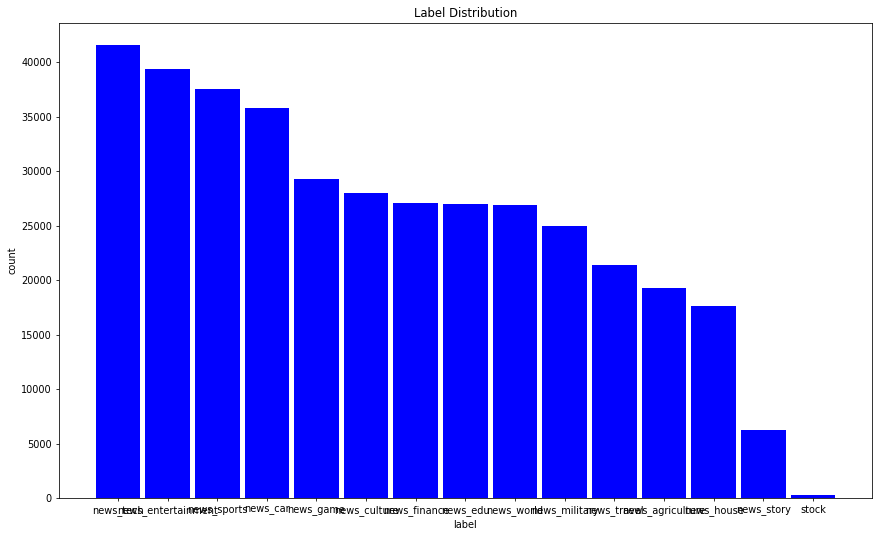

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
 
label = [i for i in df_label["label"]]
count = [int(i) for i in df_label["count"]]  
labels = label[0:-1]
count = count[0:-1]
fig = plt.figure()
plt.figure(figsize=(15,9),dpi=70)
plt.bar(labels,count,0.9,color="blue")
plt.xlabel("label")
plt.ylabel("count")
plt.title('Label Distribution')
plt.show() 

## Transfer the label into label_id

In [6]:
df['label_id'] = df['label'].factorize()[0]
label_id_df = df[['label', 'label_id']].drop_duplicates().sort_values('label_id').reset_index(drop=True)
label_to_id = dict(label_id_df.values)
id_to_label = dict(label_id_df[['label_id', 'label']].values)
print(df.sample(10))

                     label                                               news  \
113163            news_car  配 吉利 高端 车标 卖 万 气势 输 万特 特斯 特斯拉 斯拉 颜 值 特斯 特斯拉 斯拉...   
78376   news_entertainment  王 丽 坤 水原 希 子 一起 亮相 戛纳 电影 电影节 两位 仙女 互相 献 吻 王 丽 ...   
214196  news_entertainment   陈 出席 活动 网友 万人迷 老 迷倒 不成问题 成问题 问题 万人迷 陈 东方 陈 出席 东方   
137556        news_finance  债市 爆 雷 不断 相关 债券 实质 实质性 违约 中 安 消 暴跌 信用 债 凯 迪 电力...   
344448    news_agriculture  国外 引进 最新 新品 新品种 品种 亩产 亩产值 产值 万 没有 大面 大面积 面积 推广...   
272833         news_sports  季后赛 激战 来看 看看 杜兰特 兰特 强 投 能力 到底 恐怖 强 投 米德 米德尔 德尔...   
88000            news_game                         适合 合情 情侣 两 玩 第一 第一人称 人称 游戏   
187805          news_house      贴心 服务 完善 配套 梦 湖 孔雀 城 房地 房地产 地产 梦 湖 孔雀 城 生态 宜居   
116018          news_house  买卖 买卖双方 双方 绕开 开房 房屋 房屋中介 屋中 中介 私聊 买房 买房人 被判 支付...   
28130          news_sports  有惊无险 中国 女乒 实现 四连冠 石川 佳 纯 刘 诗 雯 平野 美 宇 四连冠 伊 藤 美 诚   

        label_id  
113163         6  
78376          2  
214196         2  
137556         4  
344448       

# LSTM Model
Changed the Dropout rate from 0.2 to 0.5 according to the professors' advice

In [9]:
from keras.preprocessing.text import Tokenizer
MAX_NB_WORDS = 50000 # Set the most frequently used 50,000 words
MAX_SEQUENCE_LENGTH = 250  # Set the max length for each cut news
EMBEDDING_DIM = 100 # Set the dimensionality of the Embedding layer
# num_words: Maximum number of retained words, calculated based on word frequency, retaining the first num_word - 1
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['news'].values)
word_index = tokenizer.word_index
print('There are %s unique words.' % len(word_index))

from keras_preprocessing.sequence import pad_sequences
X = tokenizer.texts_to_sequences(df['news'].values)
# After the previous step, X is a two-level nested list of integers
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
# Now X is a numpy.ndarray
# Onehot encoding of multi-class labels
Y = pd.get_dummies(df['label_id']).values

from sklearn.model_selection import train_test_split
# Split the training set and test set,
# X is the feature set of the divided samples, Y is the label of the divided samples
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)

import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
# dropout randomly and independently sets some elements to zero, 
# while SpatialDropout1D randomly sets all elements to zero for a particular latitude
# to prevent overfitting 
# And Changed the Dropout rate from 0.2 to 0.5 
model.add(tf.keras.layers.SpatialDropout1D(0.5))
model.add(tf.keras.layers.LSTM(100, dropout=0.5, recurrent_dropout=0.5))
# Output layer contains fully-connected layers for classification, 
# and the activation function is set to softmax
model.add(tf.keras.layers.Dense(16, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


There are 144646 unique words.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 250, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 16)                1616      
                                                                 
Total params: 5,082,016
Trainable params: 5,082,016
Non-trainable params: 0
_________________________________________________________________
None


## Start training：Set 5 training cycles，batch_size=64

In [10]:
from keras.callbacks import EarlyStopping
epochs = 5
batch_size = 64 # The number of samples to be included in each batch during gradient descent
# validation_split specifies 10% data in the training set as the validation set
# callbacks: prevent overfitting and stop training early
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.01)])
model.save(r'./model.h5') # save the model


Epoch 1/5
4843/4843 [==============================] - 4502s 928ms/step - loss: 0.6753 - accuracy: 0.8029 - val_loss: 0.3842 - val_accuracy: 0.8894
Epoch 2/5
4843/4843 [==============================] - 4170s 861ms/step - loss: 0.3731 - accuracy: 0.8920 - val_loss: 0.3523 - val_accuracy: 0.8957
Epoch 3/5
4843/4843 [==============================] - 4188s 865ms/step - loss: 0.3158 - accuracy: 0.9070 - val_loss: 0.3458 - val_accuracy: 0.8993
Epoch 4/5
4843/4843 [==============================] - 4140s 855ms/step - loss: 0.2829 - accuracy: 0.9163 - val_loss: 0.3496 - val_accuracy: 0.8993
Epoch 5/5
4843/4843 [==============================] - 4171s 861ms/step - loss: 0.2583 - accuracy: 0.9229 - val_loss: 0.3524 - val_accuracy: 0.9016


## Plot the loss and acc curves

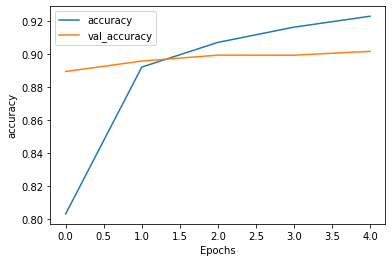

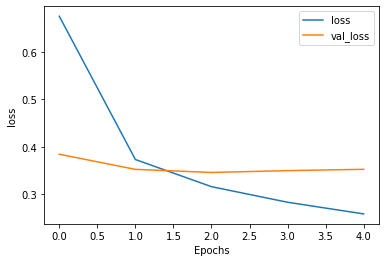

In [11]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_' + string])
    plt.show()


plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

From the training results, accuracy curve and loss curve, the number of epoch should chose 3. 

Since the val_loss in the third epoch is the lowest and the val_accuracy is 0.8993, the second highest.

# Predict Test Set

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
Y_test=np.argmax(Y_test, axis=1) # convert one-hot codes to integers
print('accuracy %s' % accuracy_score(y_pred, Y_test))
print(classification_report(Y_test, y_pred,target_names=[str(w) for w in labels]))


1196/1196 [==============================] - 110s 92ms/step
accuracy 0.896247125235208
                    precision    recall  f1-score   support

         news_tech       0.88      0.90      0.89      2759
news_entertainment       0.91      0.92      0.91      3938
       news_sports       0.96      0.95      0.96      3765
          news_car       0.85      0.82      0.83      2716
         news_game       0.93      0.93      0.93      1782
      news_culture       0.95      0.93      0.94      3514
      news_finance       0.90      0.91      0.91      2615
          news_edu       0.88      0.88      0.88      4248
        news_world       0.87      0.89      0.88      2445
     news_military       0.84      0.86      0.85      2191
       news_travel       0.85      0.84      0.84      2706
  news_agriculture       0.88      0.91      0.90      1957
        news_house       0.92      0.93      0.92      2924
        news_story       0.00      0.00      0.00        42
            

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Predict two news 

In [13]:
def Predict(text):
    txt = pretty_cut(text)
    seq = tokenizer.texts_to_sequences(txt)
    padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
    pred = model.predict(padded)
    label_id= pred.argmax(axis=1)[0]
    print(text + " : " + label_id_df[label_id_df.label_id==label_id]['label'].values[0])

In [17]:
Predict("腾讯发布“00后画像报告” 颠覆我们对这一代的认知 00后,00后画像报告,腾讯,大数据,腾讯QQ")
# Tencent Releases "Post-00s Portrait Report" Overturning Our Perceptions of This Generation Post-00s, Post-00s Portrait Report, Tencent, Big Data, Tencent QQ

1/1 [==============================] - 0s 67ms/step
腾讯发布“00后画像报告” 颠覆我们对这一代的认知 00后,00后画像报告,腾讯,大数据,腾讯QQ : news_tech


In [18]:
Predict("教师招聘重要考点备考之中国古代教育专题 有教无类,孔子,九品中正制,科举制,察举制")
# The important point of preparation for the teacher recruitment of ancient Chinese education topics There is no class, Confucius, the ninth grade system, the imperial examination system, the imperial examination system

1/1 [==============================] - 0s 82ms/step
教师招聘重要考点备考之中国古代教育专题 有教无类,孔子,九品中正制,科举制,察举制 : news_edu
